## **Reclamaciones sobre el seguro de la compañía de automóviles**

Diccionario de Datos

| Nombre de columna             | Tipo de datos | Descripción                                                                                                                                                                                           |   |   |
|-------------------------------|---------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|
| NAIC                          | En t          | Número de identificación de la Asociación Nacional de Comisionados de Seguros                                                                                                                         |   |   |
| nombre de empresa             | Objeto        | Nombre de la compañía de seguros                                                                                                                                                                      |   |   |
| Relación                      | Flotar        | El índice de quejas es el cociente del número de quejas confirmadas dividido por el promedio de las primas del año actual y anterior de una empresa emitidas directamente en el estado de Nueva York. |   |   |
| Quejas confirmadas            | Flotar        | Número de casos de denuncia "confirmados"                                                                                                                                                             |   |   |
| Cuestión de quejas de hecho   | En t          | Número de casos de "cuestiones de hecho"                                                                                                                                                              |   |   |
| Quejas no confirmadas         | En t          | Número de casos "no confirmados o retirados"                                                                                                                                                          |   |   |
| Quejas totales                | En t          | Suma de "Quejas confirmadas", "Quejas por cuestiones de hecho" y "Quejas no confirmadas"                                                                                                              |   |   |
| Primas emitidas (en millones) | Flotar        | Promedio de las primas del año actual y anterior de una empresa emitidas directamente en el estado de Nueva York (en millones de dólares)                                                             |   |   |
| Rango                         | En t          | Número correspondiente a la ubicación de una empresa en el listado del informe                                                                                                                        |   |   |
| Año de presentación           | En t          | Representa el año en que se cerró la presentación de la denuncia.                                                                                                                                     |   |   |
|                               |               |                                                                                                                                                                                                       |   |   |
|                               |               |                                                                                                                                                                                                       |   |   |

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
ruta=('/content/drive/MyDrive/Codificación de Dojo/Exámen/Mod_auto-insurance-complaint-rankings.xlsx')


In [40]:
df = pd.read_excel(ruta)

In [41]:
df.head()

,Unnamed: 0,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,0,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2016
1,1,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2016
2,2,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2016
3,3,15024,Preferred Mutual Insurance Company,0.0,0.0,3,2,5,62.505,4,2016
4,4,10052,Chubb National Insurance Company,0.0,0.0,1,2,3,46.735,5,2016


In [42]:
df.shape

(1363, 11)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1363 non-null   int64  
 1   NAIC                            1363 non-null   int64  
 2   Company Name                    1363 non-null   object 
 3   Ratio                           1363 non-null   float64
 4   Upheld Complaints               1358 non-null   float64
 5   Question of Fact Complaints     1363 non-null   object 
 6   Not Upheld Complaints           1363 non-null   int64  
 7   Total Complaints                1363 non-null   object 
 8   Premiums Written (in Millions)  1363 non-null   float64
 9   Rank                            1363 non-null   int64  
 10  Filing Year                     1363 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 117.3+ KB


Incongruencias:
- Columna 4  Upheld Complaints, null


In [44]:
df.tail()

,Unnamed: 0,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
1358,1353,22667,ACE American Insurance Company,12.5881,1.0,0,3,4,0.079,177,2009
1359,1354,23809,Granite State Insurance Company,14.2471,1.0,0,0,1,0.070,178,2009
1360,1355,10982,Long Island Insurance Company,25.8860,265.0,17,73,355,10.237,179,2009
1361,1356,16535,Zurich American Insurance Company,36.5845,1.0,0,1,2,0.027,180,2009
1362,1357,42889,Victoria Fire & Casualty Company,152.9403,1.0,1,1,3,0.007,181,2009


In [45]:
# Las Columna Unnamed:0 parece conincidir con el índice, pero no es así.
# Verificación de duplicados
df.duplicated().sum()

5

In [46]:
# Eliminación de elemtos duplicados
df = df.drop_duplicates()
df.duplicated().sum()

0

In [47]:
#Visualización de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1362
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1358 non-null   int64  
 1   NAIC                            1358 non-null   int64  
 2   Company Name                    1358 non-null   object 
 3   Ratio                           1358 non-null   float64
 4   Upheld Complaints               1353 non-null   float64
 5   Question of Fact Complaints     1358 non-null   object 
 6   Not Upheld Complaints           1358 non-null   int64  
 7   Total Complaints                1358 non-null   object 
 8   Premiums Written (in Millions)  1358 non-null   float64
 9   Rank                            1358 non-null   int64  
 10  Filing Year                     1358 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 127.3+ KB


In [48]:
df.head()

,Unnamed: 0,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,0,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2016
1,1,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2016
2,2,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2016
3,3,15024,Preferred Mutual Insurance Company,0.0,0.0,3,2,5,62.505,4,2016
4,4,10052,Chubb National Insurance Company,0.0,0.0,1,2,3,46.735,5,2016


In [49]:
# Sigue existiendo diferencia entre la columna unnamed:0 y el indice, pero no está definida en el diccionario por lo quela borraré
df.tail()

,Unnamed: 0,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
1358,1353,22667,ACE American Insurance Company,12.5881,1.0,0,3,4,0.079,177,2009
1359,1354,23809,Granite State Insurance Company,14.2471,1.0,0,0,1,0.070,178,2009
1360,1355,10982,Long Island Insurance Company,25.8860,265.0,17,73,355,10.237,179,2009
1361,1356,16535,Zurich American Insurance Company,36.5845,1.0,0,1,2,0.027,180,2009
1362,1357,42889,Victoria Fire & Casualty Company,152.9403,1.0,1,1,3,0.007,181,2009


In [50]:
df= df.drop(columns=['Unnamed: 0'])


In [51]:
df.head()

,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2016
1,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2016
2,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2016
3,15024,Preferred Mutual Insurance Company,0.0,0.0,3,2,5,62.505,4,2016
4,10052,Chubb National Insurance Company,0.0,0.0,1,2,3,46.735,5,2016


In [52]:
# Visualizacion de Null
df.isna().sum()

NAIC                              0
Company Name                      0
Ratio                             0
Upheld Complaints                 5
Question of Fact Complaints       0
Not Upheld Complaints             0
Total Complaints                  0
Premiums Written (in Millions)    0
Rank                              0
Filing Year                       0
dtype: int64

In [53]:
df[df['Upheld Complaints'].isnull()]

,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
12,11252,Encompass Home and Auto Insurance Company,0.0,NaN,1,3,4,23.911,13,2016
13,30210,Esurance Property and Casualty Insurance Company,0.0,NaN,3,7,10,23.263,14,2016
14,13803,Farm Family Casualty Insurance Company,0.0,NaN,0,1,1,22.796,15,2016
15,18279,Bankers Standard Insurance Company,0.0,NaN,0,0,0,20.956,16,2016
16,11185,"Foremost Insurance Company Grand Rapids, Michigan",0.0,NaN,2,6,8,19.667,17,2016


In [54]:
#valores de la columna con nulos
df['Upheld Complaints'].value_counts()

0.0      607
1.0      291
2.0      146
3.0       71
4.0       59
5.0       42
6.0       22
7.0       19
8.0       13
9.0       12
10.0       7
12.0       5
11.0       5
14.0       4
15.0       4
21.0       3
24.0       3
45.0       3
23.0       3
16.0       3
20.0       2
29.0       2
13.0       2
27.0       2
30.0       2
18.0       2
26.0       2
37.0       1
60.0       1
170.0      1
32.0       1
25.0       1
180.0      1
97.0       1
59.0       1
67.0       1
116.0      1
28.0       1
99.0       1
75.0       1
76.0       1
54.0       1
43.0       1
265.0      1
Name: Upheld Complaints, dtype: int64

In [55]:
# Por la definicón del diccionario, reemplazaré los nulos por 0,con el método fillna puesto que refiere a número de casos o 'Ninguno'.

df['Upheld Complaints'].fillna(0,inplace=True)
df['Upheld Complaints'].value_counts()

0.0      612
1.0      291
2.0      146
3.0       71
4.0       59
5.0       42
6.0       22
7.0       19
8.0       13
9.0       12
10.0       7
12.0       5
11.0       5
14.0       4
15.0       4
21.0       3
24.0       3
45.0       3
23.0       3
16.0       3
20.0       2
29.0       2
13.0       2
27.0       2
30.0       2
18.0       2
26.0       2
37.0       1
60.0       1
170.0      1
32.0       1
25.0       1
180.0      1
97.0       1
59.0       1
67.0       1
116.0      1
28.0       1
99.0       1
75.0       1
76.0       1
54.0       1
43.0       1
265.0      1
Name: Upheld Complaints, dtype: int64

In [56]:
#Verificación de los valores Null en el Data Frame
df.isna().sum()

NAIC                              0
Company Name                      0
Ratio                             0
Upheld Complaints                 0
Question of Fact Complaints       0
Not Upheld Complaints             0
Total Complaints                  0
Premiums Written (in Millions)    0
Rank                              0
Filing Year                       0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1362
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAIC                            1358 non-null   int64  
 1   Company Name                    1358 non-null   object 
 2   Ratio                           1358 non-null   float64
 3   Upheld Complaints               1358 non-null   float64
 4   Question of Fact Complaints     1358 non-null   object 
 5   Not Upheld Complaints           1358 non-null   int64  
 6   Total Complaints                1358 non-null   object 
 7   Premiums Written (in Millions)  1358 non-null   float64
 8   Rank                            1358 non-null   int64  
 9   Filing Year                     1358 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 116.7+ KB


Con los Ajustes emitidos la diferencias con el diccionario son los siguientes:
- Question of Fact Complaints debe ser int
- Total Complaints debe ser int

In [58]:
# visualización de los valores que contiene la columna Cuestion de Quejas de hecho
df['Question of Fact Complaints'].value_counts()

0      472
1      240
2      137
3       95
4       69
      ... 
61       1
184      1
83       1
92       1
107      1
Name: Question of Fact Complaints, Length: 79, dtype: int64

In [59]:
df['Question of Fact Complaints']= df['Question of Fact Complaints'].astype(int)

ValueError: ignored

In [60]:
# me muestra el error, posiblemente de tipeo. Cambiaré el valor por 46
df['Question of Fact Complaints']= df['Question of Fact Complaints'].replace('46_', 46)

In [61]:
df['Question of Fact Complaints']= df['Question of Fact Complaints'].astype(int)

In [62]:
#verificacion del cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1362
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAIC                            1358 non-null   int64  
 1   Company Name                    1358 non-null   object 
 2   Ratio                           1358 non-null   float64
 3   Upheld Complaints               1358 non-null   float64
 4   Question of Fact Complaints     1358 non-null   int64  
 5   Not Upheld Complaints           1358 non-null   int64  
 6   Total Complaints                1358 non-null   object 
 7   Premiums Written (in Millions)  1358 non-null   float64
 8   Rank                            1358 non-null   int64  
 9   Filing Year                     1358 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 116.7+ KB


In [64]:
# verificación de valores de la columna Total Complaints
df['Total Complaints'].value_counts()

0      189
1      144
2      116
3       93
4       83
      ... 
242      1
92       1
430      1
189      1
355      1
Name: Total Complaints, Length: 135, dtype: int64

In [63]:
df['Total Complaints']= df['Total Complaints'].astype(int)

ValueError: ignored

In [67]:
# me muestra el error, posiblemente de tipeo. Cambiaré el valor Fifteen por 15
df['Total Complaints']= df['Total Complaints'].replace('Fifteen', 15)


In [68]:
df['Total Complaints']= df['Total Complaints'].astype(int)

In [70]:
# verificación tipo
df['Total Complaints'].dtypes

dtype('int64')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1362
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAIC                            1358 non-null   int64  
 1   Company Name                    1358 non-null   object 
 2   Ratio                           1358 non-null   float64
 3   Upheld Complaints               1358 non-null   float64
 4   Question of Fact Complaints     1358 non-null   int64  
 5   Not Upheld Complaints           1358 non-null   int64  
 6   Total Complaints                1358 non-null   int64  
 7   Premiums Written (in Millions)  1358 non-null   float64
 8   Rank                            1358 non-null   int64  
 9   Filing Year                     1358 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 116.7+ KB


In [72]:
df.head()

,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2016
1,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2016
2,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2016
3,15024,Preferred Mutual Insurance Company,0.0,0.0,3,2,5,62.505,4,2016
4,10052,Chubb National Insurance Company,0.0,0.0,1,2,3,46.735,5,2016


## Visualizaciones

In [78]:
df['Company Name'].value_counts()

Progressive Specialty Insurance Company     8
GEICO General Insurance Company             8
Nationwide Mutual Fire Insurance Company    8
GEICO Indemnity Company                     8
Progressive Advanced Insurance Company      8
                                           ..
National Interstate Insurance Company       1
Illinois National Insurance Co.             1
Pacific Specialty Insurance Company         1
Kingstone Insurance Company                 1
Zurich American Insurance Company           1
Name: Company Name, Length: 223, dtype: int64

In [79]:
#Verificación valores de columna año
df['Filing Year'].value_counts()

2009    181
2010    179
2012    172
2013    171
2014    170
2011    169
2016    158
2015    158
Name: Filing Year, dtype: int64

In [80]:
# error de tipeo en la columna Filing Year, se cambiaré el 3016 a 2016
df['Filing Year']= df['Filing Year'].replace(3016, 2016)
df['Filing Year'].value_counts()


2009    181
2010    179
2012    172
2013    171
2014    170
2011    169
2016    158
2015    158
Name: Filing Year, dtype: int64

In [84]:
df1= df.groupby('Filing Year')['Total Complaints'].sum()
df1

Filing Year
2009    6808
2010    6426
2011    4700
2012    4023
2013    3389
2014    4487
2015    3043
2016    3043
Name: Total Complaints, dtype: int64

# Gráfico 'Total de Reclamos por año'

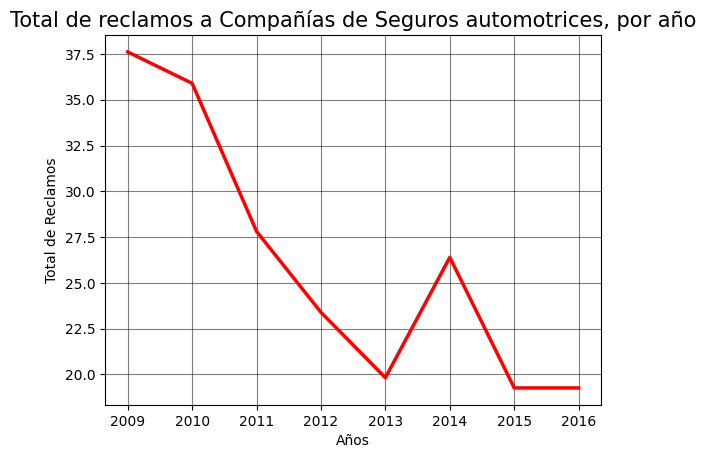

In [121]:
figura = plt.figure(dpi=100)

sns.lineplot(x="Filing Year", y="Total Complaints",
             data=df,
             color= 'red',
             lw= 2.5,
             errorbar= None,
             markers=True)

plt.title('Total de reclamos a Compañías de Seguros automotrices, por año', fontsize=15,color= 'black')
plt.xlabel('Años', color= 'black')
plt.ylabel('Total de Reclamos')
plt.grid(color= 'black',alpha=0.5)

figura.savefig('Total de reclamos por anio.png',facecolor='#FFFFFF',bbox_inches='tight')

plt.show()


## *El gráfico anterior muestra la disminución del número de reclamos entre los años  2009 al 2013. En el año 2014 se ve un incremento de un promedio a la baja de 20 casos por año  a 26 casos promedio. El año 2015 nuevamente vuelve la tendencia a la baja  en los reclamos manteniendose constante para el año 2016.*

## *Por lo que ha habido un buen manejo de las políticas internas de las aseguradoras del campo automotriz.*

In [162]:
# Haré una selección  de las mejores 20 compañías, para ver su comportamiento
df_rank3 = df.loc[(df['Rank']<4)]
df_rank3

,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2016
1,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2016
2,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2016
160,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2015
161,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2015
162,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2015
319,24279,Progressive Max Insurance Company,0.0,0.0,8,21,29,70.055,1,2014
320,10212,Allmerica Financial Alliance Insurance Company,0.0,0.0,0,9,9,47.319,2,2014
321,10052,Chubb National Insurance Company,0.0,0.0,0,1,1,37.431,3,2014
489,36447,LM General Insurance Company,0.0,0.0,6,3,9,73.566,1,2013


#Gráfico de los reclamos de las 3 mejores compañías de seguros

In [163]:
df_rank3['Upheld Complaints'].value_counts()

0.0    24
Name: Upheld Complaints, dtype: int64

In [164]:
df2=df_rank3.groupby('Company Name')['Rank'].sum()
df2

Company Name
A. Central Insurance Company                      3
Adirondack Insurance Exchange                     2
Allmerica Financial Alliance Insurance Company    5
Amica Mutual Insurance Company                    7
Chubb National Insurance Company                  3
Erie Insurance Company                            5
Great Northern Insurance Company                  3
Kemper Independence Insurance Company             3
LM General Insurance Company                      1
Nationwide Insurance Company of America           6
Nationwide Mutual Insurance Company               1
Phoenix Insurance Company                         3
Progressive Advanced Insurance Company            1
Progressive Max Insurance Company                 1
Progressive Northwestern Insurance Company        2
Progressive Specialty Insurance Company           2
Name: Rank, dtype: int64

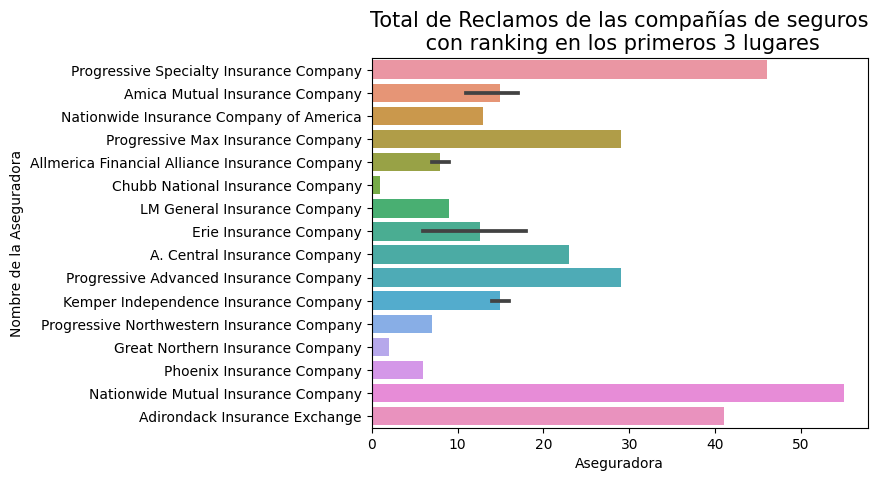

In [188]:
figura1= plt.figure(dpi=100)

sns.barplot(x='Total Complaints', y='Company Name',data=df_rank3)
plt.title('Total de Reclamos de las compañías de seguros\n con ranking en los primeros 3 lugares', color='black',fontsize = 15)
plt.xlabel('Aseguradora')
plt.ylabel('Nombre de la Aseguradora')
plt.show()

##De las compañía que poseen los primeros tres mejores ranking. Nationwide Mutual Insurance Company es la que presenta mayor cantidad de reclamos, seguida por Progressive Specialty Insurance Company.
# Mientras que destacan las Compañías Chubb National Insurance Company y Great Norther Insaurance Company, por su baja cantidad de reclamos.
# En general estas compañías, poseen menos de 55 reclamos por la cantidad de tiempo en que fue tomada la muestra.


# **Gráfica Tipos de Reclamos de las mejores compañías se seguros automotrices**

<ipython-input-195-987516cd3294>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 800x550 with 0 Axes>

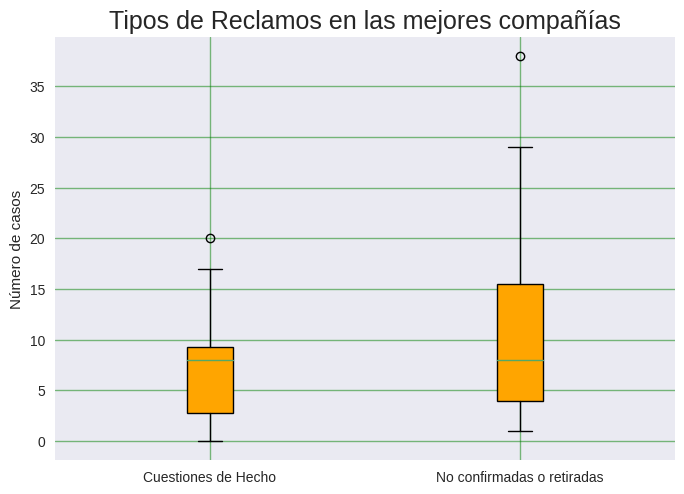

In [195]:
c= 'black'
fig= plt.figure(dpi=100)
fig, axes = plt.subplots(nrows = 1, ncols = 1)
plt.boxplot([df_rank3['Question of Fact Complaints'], df_rank3['Not Upheld Complaints']],
            labels=['Cuestiones de Hecho','No confirmadas o retiradas'],
            data=df_rank3,
            patch_artist=True,
            boxprops=dict(facecolor='orange', color= c))
plt.title('Tipos de Reclamos en las mejores compañías', fontsize=18)
plt.ylabel('Número de casos')
plt.style.use('seaborn')
plt.grid(color='green',alpha= 0.5)
plt.show()

## La gráfica muestra la mediana de casos tipo 'Cuestiones de Hecho' que equivale 8 casos, por las mejores compañías de seguro automotrices.
## Mientras que los casos No confirmados o retirados tienen una mediana similar un poco mas baja.
## Existe un caso outlier en cuestiones de Hecho de 20 casos muy superiro a la media.
## Los tipos 'Cuestiones de hecho' estan mas distribuídos a la izquierda y los tipos 'NO confirmadas o Retiradas' estan más ditribuídas a la derecha.

##Gráfica ¿Cuánto ingreso anuel obtuvieron las mejores compañías de seguros?

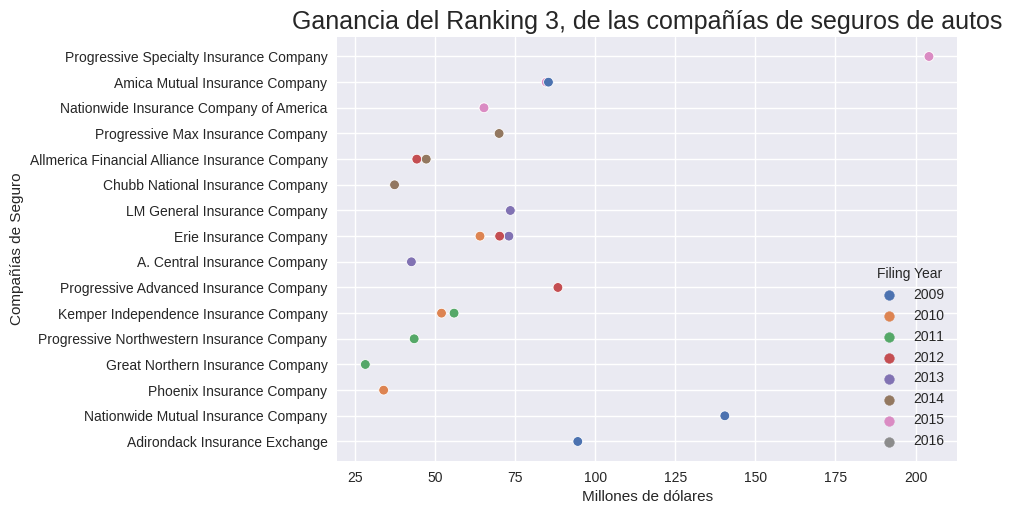

In [212]:
fig= plt.figure(dpi=100)
sns.scatterplot(x="Premiums Written (in Millions)", y="Company Name", hue="Filing Year", data=df_rank3, palette="deep")

plt.title('Ganancia del Ranking 3, de las compañías de seguros de autos', fontsize=18)
plt.xlabel('Millones de dólares')
plt.ylabel('Compañías de Seguro')

plt.show()

# La gráfica muestra que la compañía que mas ha ganado dinero es 'Progressive Spcecialty Insurance Company, en el año 2015 con una ganancia de las de 200 millones de dólares. Mientra que lo mínimo ganando es de la Compañía 'Great Northern Insaurance Company en el año 2011 con un poco más de 25 millones de dólares.
# En general, las compañías perciben ganancias entre los 30 a 75 millones de dólares.